# Identify stadials and interstadials (visually)

In [10]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the data
TEMP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/TEMP/200.npy')

# Create a DataFrame
df_temp = pd.DataFrame({'TEMP': TEMP})

# Pack the stadial and interstadial onsets and ends into ndarrays
stadial_onsets = np.array([0, 185, 439, 672])
stadial_ends = np.array([80, 336, 569, 787])

interstadial_onsets = np.array([107, 356, 589])
interstadial_ends = np.array([160, 408, 642])

stadials = np.vstack((stadial_onsets, stadial_ends)).T
interstadials = np.vstack((interstadial_onsets, interstadial_ends)).T

stadial_labels = ['S1', 'S2', 'S3', 'S4']
interstadial_labels = ['IS1', 'IS2', 'IS3']

# Plot using Plotly
fig = px.line(df_temp, y='TEMP', title='Temperature Over Time', labels={'index': 'Time', 'TEMP': 'Temperature'})

# Add blue vertical lines and labels for stadial onsets and ends
for (onset, end), label in zip(stadials, stadial_labels):
    fig.add_vline(x=onset, line=dict(color='blue', width=1))
    fig.add_vline(x=end, line=dict(color='blue', width=1))
    midpoint = (onset + end) / 2
    fig.add_annotation(x=midpoint, y=max(TEMP), text=label, showarrow=False, yshift=10, font=dict(color='blue'))

# Add red vertical lines and labels for interstadial onsets and ends
for (onset, end), label in zip(interstadials, interstadial_labels):
    fig.add_vline(x=onset, line=dict(color='red', width=1))
    fig.add_vline(x=end, line=dict(color='red', width=1))
    midpoint = (onset + end) / 2
    fig.add_annotation(x=midpoint, y=max(TEMP), text=label, showarrow=False, yshift=10, font=dict(color='red'))

fig.show()


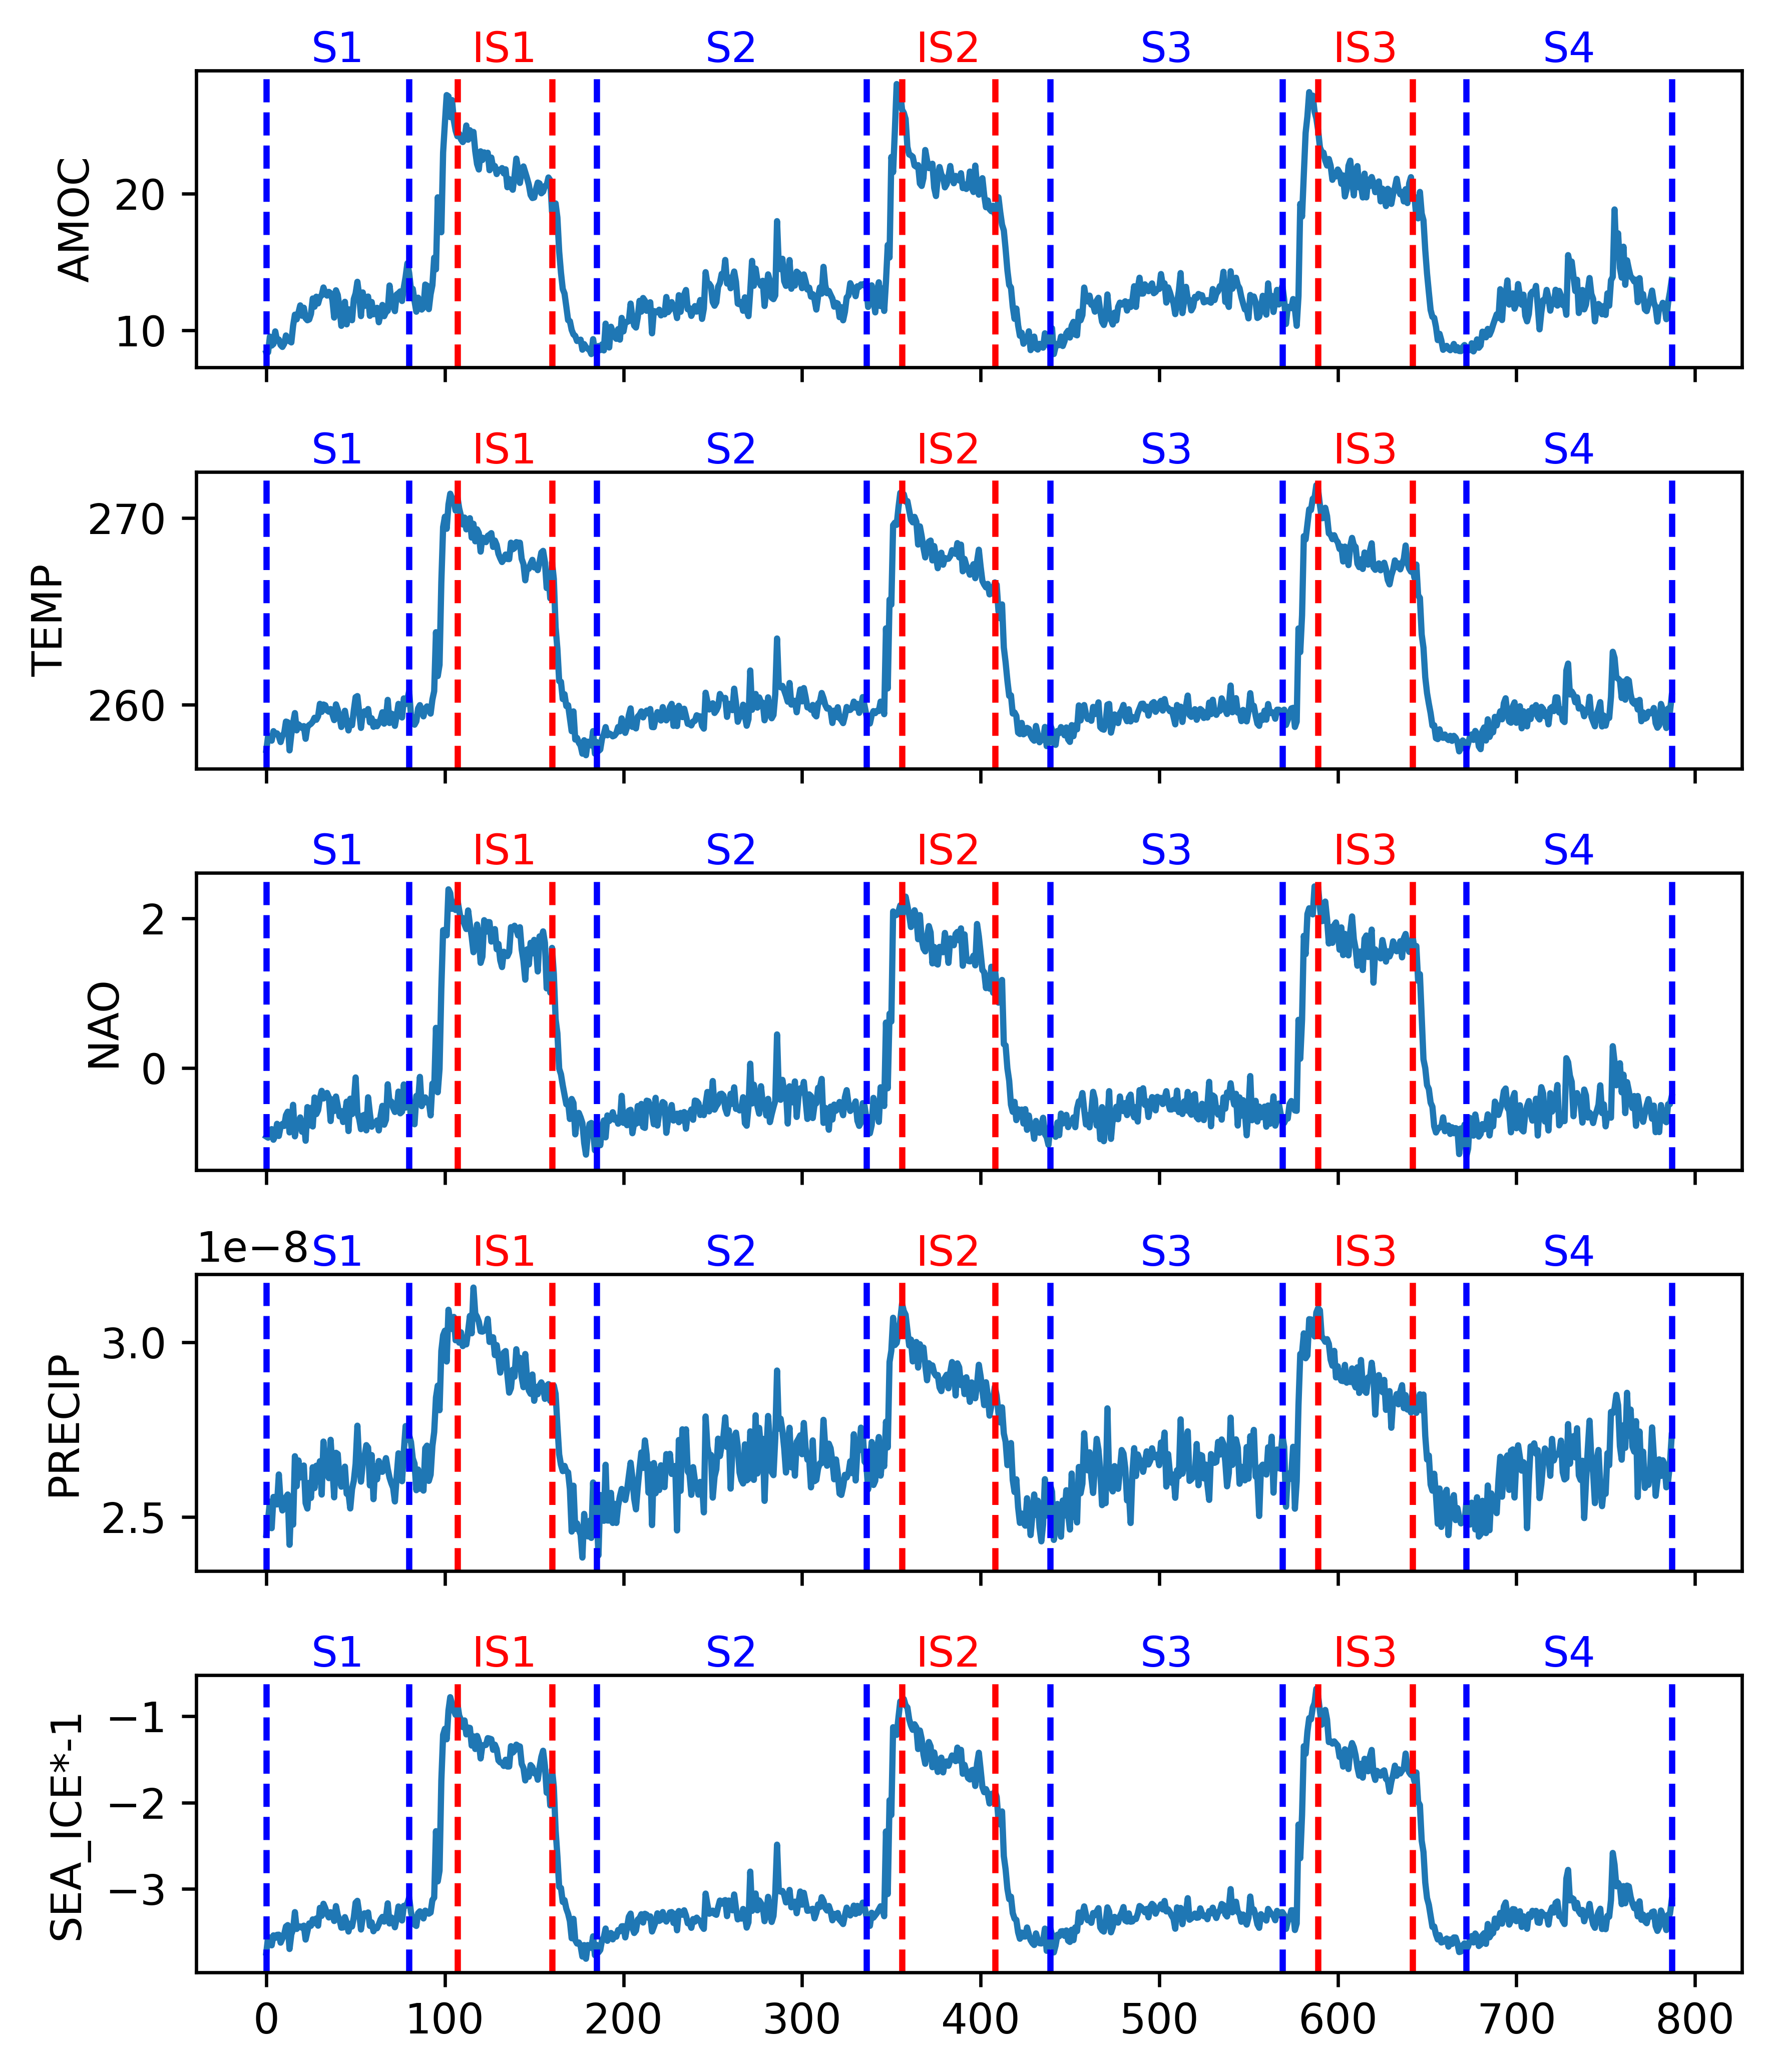

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMOC     788 non-null    float32
 1   TEMP     788 non-null    float64
 2   NAO      788 non-null    float32
 3   PRECIP   788 non-null    float64
 4   SEA_ICE  788 non-null    float32
dtypes: float32(3), float64(2)
memory usage: 21.7 KB


In [15]:

import numpy as np
# read the AMOC data (called '200.npy') from the /data/CCSM4/AMOC/ directory
AMOC = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/AMOC/200.npy')
TEMP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/TEMP/200.npy')
NAO = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/NAO/200.npy')
PRECIP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/PRECIP/200.npy')
SEA_ICE = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/SEA_ICE/200.npy')


# plot the data in 5 subplots

import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, figsize=(6, 7), sharex=True, dpi=600)
ax[0].plot(AMOC)
ax[0].set_ylabel('AMOC')
ax[1].plot(TEMP)
ax[1].set_ylabel('TEMP')
ax[2].plot(NAO)
ax[2].set_ylabel('NAO')
ax[3].plot(PRECIP)
ax[3].set_ylabel('PRECIP')
ax[4].plot(SEA_ICE*-1)
ax[4].set_ylabel('SEA_ICE*-1')

# for each subplot, add vertical lines for the stadial and interstadial onsets and ends
for onset, end in stadials:
    for i in range(5):
        ax[i].axvline(onset, color='blue', linestyle='--')
        ax[i].axvline(end, color='blue', linestyle='--')
        
for onset, end in interstadials:
    for i in range(5):
        ax[i].axvline(onset, color='red', linestyle='--')
        ax[i].axvline(end, color='red', linestyle='--')

stadial_labels = ['S1', 'S2', 'S3', 'S4']
interstadial_labels = ['IS1', 'IS2', 'IS3']

# add labels for the stadials and interstadials
for (onset, end), label in zip(stadials, stadial_labels):
    for i in range(5):
        midpoint = (onset + end) / 2
        ax[i].text(midpoint, ax[i].get_ylim()[1], label, color='blue', va='bottom', ha='center')

for (onset, end), label in zip(interstadials, interstadial_labels):
    for i in range(5):
        midpoint = (onset + end) / 2
        ax[i].text(midpoint, ax[i].get_ylim()[1], label, color='red', va='bottom', ha='center')

plt.tight_layout()

plt.show()


import pandas as pd
df_all_vars= pd.DataFrame({'AMOC': AMOC, 'TEMP': TEMP, 'NAO': NAO, 'PRECIP': PRECIP, 'SEA_ICE': SEA_ICE})
df_all_vars.info()

# Crop data for stadials and interstadials

In [27]:
len(AMOC_stadials)

4

In [33]:
for j in range(4):
    print(j)

0
1
2
3


In [35]:
len(stadial_data[0])

4

In [39]:
stadial_data[0][3]

array([ 8.754398 ,  8.722826 ,  8.562607 ,  9.060438 ,  8.465574 ,
        8.743194 ,  9.34466  ,  8.734881 ,  8.900402 ,  9.909098 ,
        9.882118 ,  9.496453 , 10.114973 ,  9.679941 ,  9.985375 ,
       10.416823 , 10.8101   , 11.18292  , 10.911843 , 13.019808 ,
       10.763201 , 12.590002 , 12.560497 , 13.661511 , 11.893123 ,
       12.150087 , 12.710655 , 11.594497 , 11.972268 , 13.397563 ,
       12.541153 , 11.883511 , 12.619216 , 11.07576  , 10.667021 ,
       11.202239 , 12.662465 , 12.842741 , 12.687841 , 13.261573 ,
       11.785614 , 10.080316 , 11.338793 , 12.222293 , 12.171542 ,
       12.968136 , 12.390796 , 11.450109 , 12.215533 , 11.941119 ,
       12.977702 , 11.819963 , 12.894994 , 12.550881 , 11.854663 ,
       11.987906 , 11.149427 , 15.514803 , 14.82169  , 15.038901 ,
       13.945189 , 12.887196 , 13.711679 , 11.278304 , 12.568188 ,
       12.962147 , 11.544224 , 11.89361  , 12.908664 , 13.837869 ,
       12.6703415, 12.312573 , 10.662928 , 11.638659 , 11.9377

In [47]:
len(AMOC_stadials[0])

81

In [53]:
len(AMOC_interstadials[0])

54

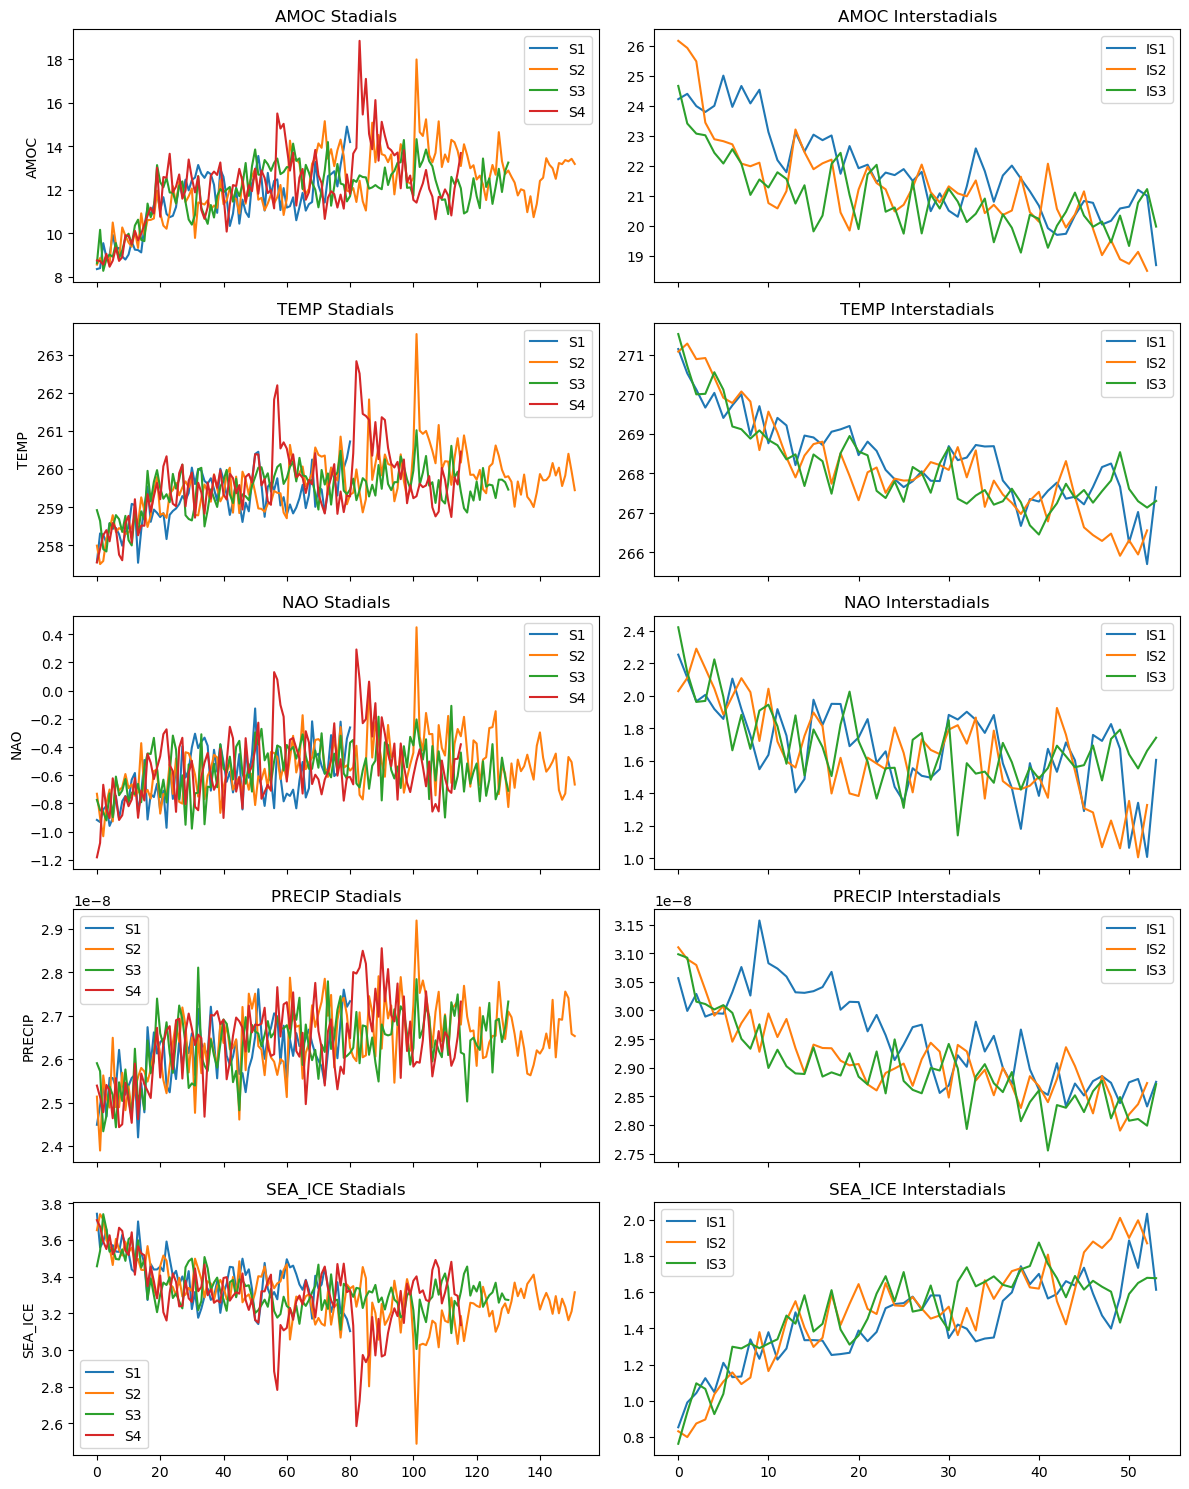

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data arrays are loaded (AMOC, TEMP, NAO, PRECIP, SEA_ICE)

# Define your stadial and interstadial periods and labels
stadials = np.array([[0, 80], [185, 336], [439, 569], [672, 787]])
interstadials = np.array([[107, 160], [356, 408], [589, 642]])
stadial_labels = ['S1', 'S2', 'S3', 'S4']
interstadial_labels = ['IS1', 'IS2', 'IS3']

# Function to crop data based on periods
def crop_data(data, periods):
    cropped_data = []
    for onset, end in periods:
        cropped_data.append(data[onset:end+1])
    return cropped_data

# Crop the data for each variable
AMOC_stadials = crop_data(AMOC, stadials)
TEMP_stadials = crop_data(TEMP, stadials)
NAO_stadials = crop_data(NAO, stadials)
PRECIP_stadials = crop_data(PRECIP, stadials)
SEA_ICE_stadials = crop_data(SEA_ICE, stadials)

AMOC_interstadials = crop_data(AMOC, interstadials)
TEMP_interstadials = crop_data(TEMP, interstadials)
NAO_interstadials = crop_data(NAO, interstadials)
PRECIP_interstadials = crop_data(PRECIP, interstadials)
SEA_ICE_interstadials = crop_data(SEA_ICE, interstadials)

# Plot the cropped data for stadials and interstadials
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
stadial_data = [AMOC_stadials, TEMP_stadials, NAO_stadials, PRECIP_stadials, SEA_ICE_stadials]
interstadial_data = [AMOC_interstadials, TEMP_interstadials, NAO_interstadials, PRECIP_interstadials, SEA_ICE_interstadials]

fig, axs = plt.subplots(5, 2, figsize=(12, 15), sharex='col')
for i, var in enumerate(variables):
    for j, data in enumerate(stadial_data[i]):
        axs[i, 0].plot(data, label=f'{stadial_labels[j]}')
    axs[i, 0].set_ylabel(var)
    axs[i, 0].set_title(f'{var} Stadials')
    axs[i, 0].legend()

    for j, data in enumerate(interstadial_data[i]):
        axs[i, 1].plot(data, label=f'{interstadial_labels[j]}')
    axs[i, 1].set_title(f'{var} Interstadials')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()


# Store the cropped data in DataFrames
stadial_dfs = {
    'AMOC': pd.DataFrame(AMOC_stadials).T,
    'TEMP': pd.DataFrame(TEMP_stadials).T,
    'NAO': pd.DataFrame(NAO_stadials).T,
    'PRECIP': pd.DataFrame(PRECIP_stadials).T,
    'SEA_ICE': pd.DataFrame(SEA_ICE_stadials).T
}

interstadial_dfs = {
    'AMOC': pd.DataFrame(AMOC_interstadials).T,
    'TEMP': pd.DataFrame(TEMP_interstadials).T,
    'NAO': pd.DataFrame(NAO_interstadials).T,
    'PRECIP': pd.DataFrame(PRECIP_interstadials).T,
    'SEA_ICE': pd.DataFrame(SEA_ICE_interstadials).T
}


# Detrend data

In [62]:
stadial_data['AMOC']

[array([ 8.355966 ,  8.399309 ,  9.550444 ,  8.893155 ,  9.010707 ,
         9.930131 ,  9.252162 ,  9.335887 ,  8.935029 ,  8.794026 ,
         9.0231085,  9.631844 ,  9.249794 ,  9.22996  ,  9.123692 ,
        10.341501 , 11.156119 , 10.813348 , 11.3048315, 11.836111 ,
        11.077398 , 11.664197 , 10.892899 , 10.746005 , 10.804877 ,
        11.213545 , 12.339352 , 11.738773 , 12.471741 , 11.976758 ,
        12.45042  , 12.568511 , 13.144674 , 12.74496  , 12.553355 ,
        12.82468  , 12.720694 , 12.239634 , 10.943455 , 12.940595 ,
        12.595874 , 11.622387 , 10.338417 , 10.90687  , 12.097374 ,
        10.446409 , 11.55194  , 10.982506 , 10.749835 , 12.301022 ,
        12.712377 , 13.561149 , 12.556823 , 11.049991 , 12.782609 ,
        11.798659 , 12.4167385, 12.481659 , 11.071551 , 12.082224 ,
        11.185133 , 11.246842 , 11.657527 , 10.601828 , 11.207907 ,
        11.866438 , 11.044884 , 11.345045 , 11.440869 , 13.290931 ,
        12.207064 , 11.775413 , 11.414915 , 12.6

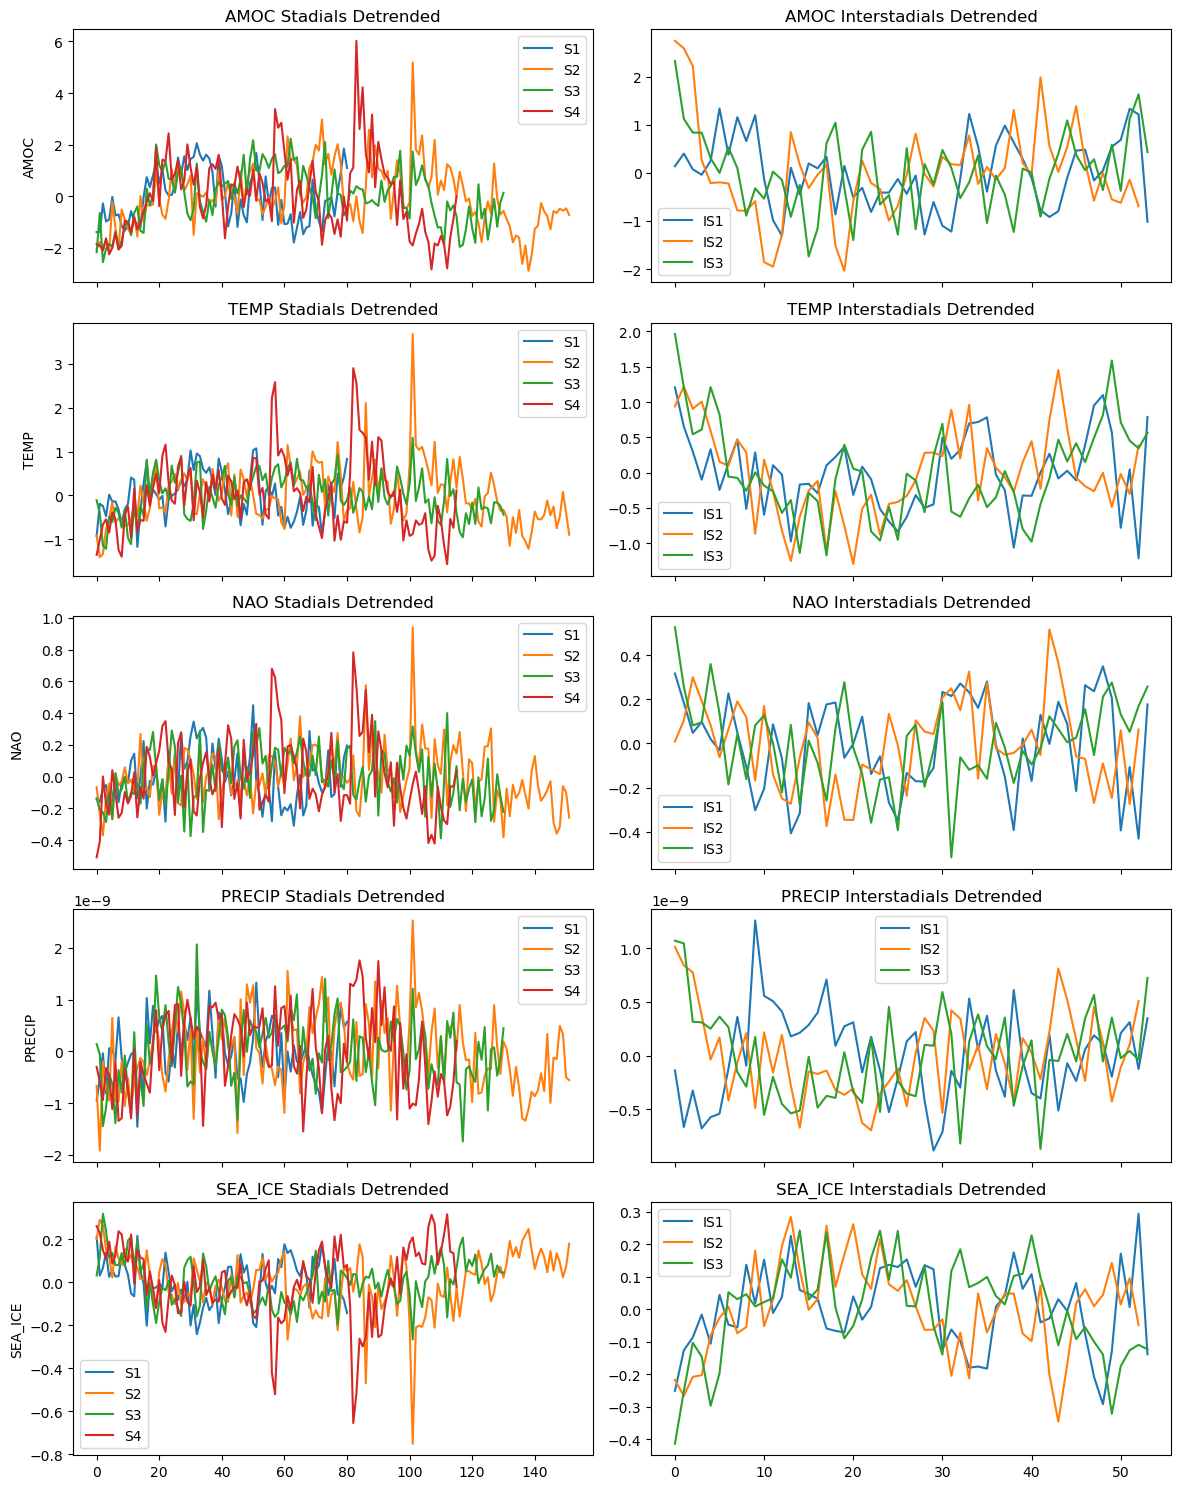

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend


# Function to crop data based on periods
def crop_data(data, periods):
    cropped_data = []
    for onset, end in periods:
        cropped_data.append(data[onset:end+1])
    return cropped_data

# Function to detrend and store as list of arrays
def detrend_and_store(cropped_data):
    detrended = []
    for data in cropped_data:
        if len(data) > 1:  # Ensure there's enough data to detrend
            detrended.append(detrend(data))
        else:
            detrended.append(data)  # If only one point or empty, skip detrending
    return detrended

# Crop the data for each variable
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
data_dict = {'AMOC': AMOC, 'TEMP': TEMP, 'NAO': NAO, 'PRECIP': PRECIP, 'SEA_ICE': SEA_ICE}
stadial_data = {var: crop_data(data_dict[var], stadials) for var in variables}
interstadial_data = {var: crop_data(data_dict[var], interstadials) for var in variables}

# Detrend the cropped data
detrended_stadials = {var: detrend_and_store(stadial_data[var]) for var in variables}
detrended_interstadials = {var: detrend_and_store(interstadial_data[var]) for var in variables}

# Plotting the detrended data
fig, axs = plt.subplots(5, 2, figsize=(12, 15), sharex='col')
for i, var in enumerate(variables):
    # Plot detrended stadials
    for j, data in enumerate(detrended_stadials[var]):
        axs[i, 0].plot(data, label=f'{stadial_labels[j]}')
    axs[i, 0].set_title(f'{var} Stadials Detrended')
    axs[i, 0].set_ylabel(var)
    axs[i, 0].legend()

    # Plot detrended interstadials
    for j, data in enumerate(detrended_interstadials[var]):
        axs[i, 1].plot(data, label=f'{interstadial_labels[j]}')
    axs[i, 1].set_title(f'{var} Interstadials Detrended')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()


# Centre the data and calculate variance

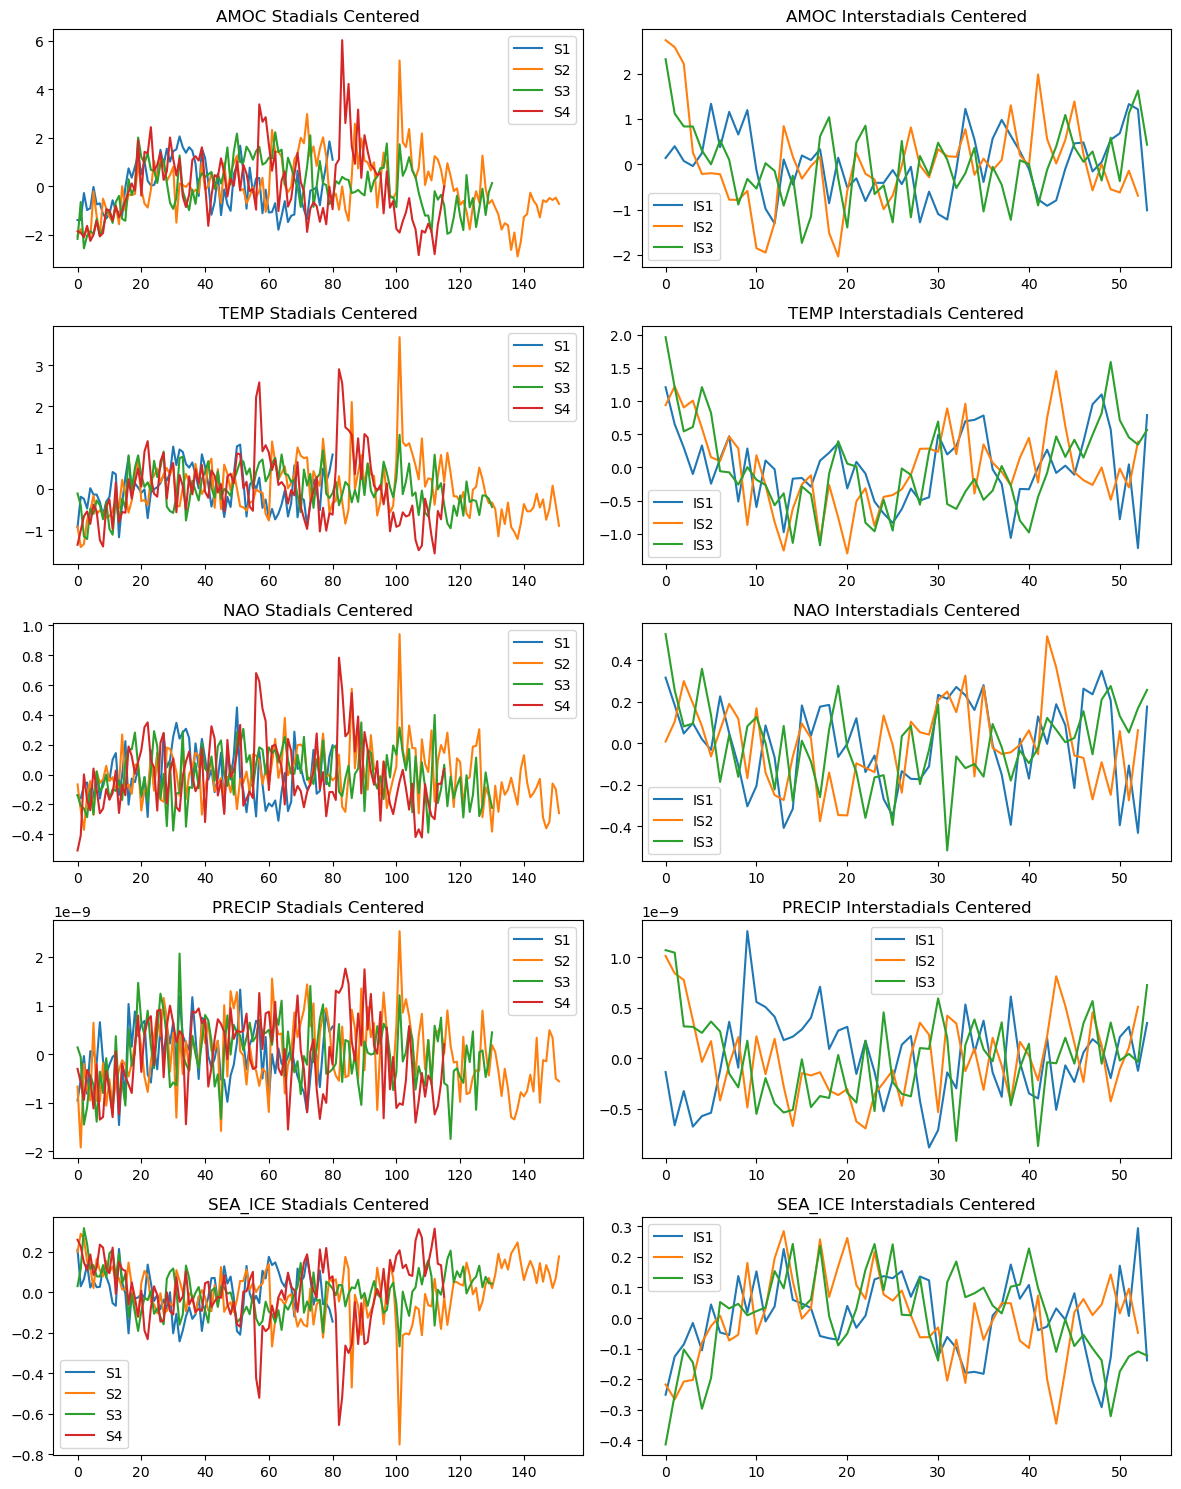

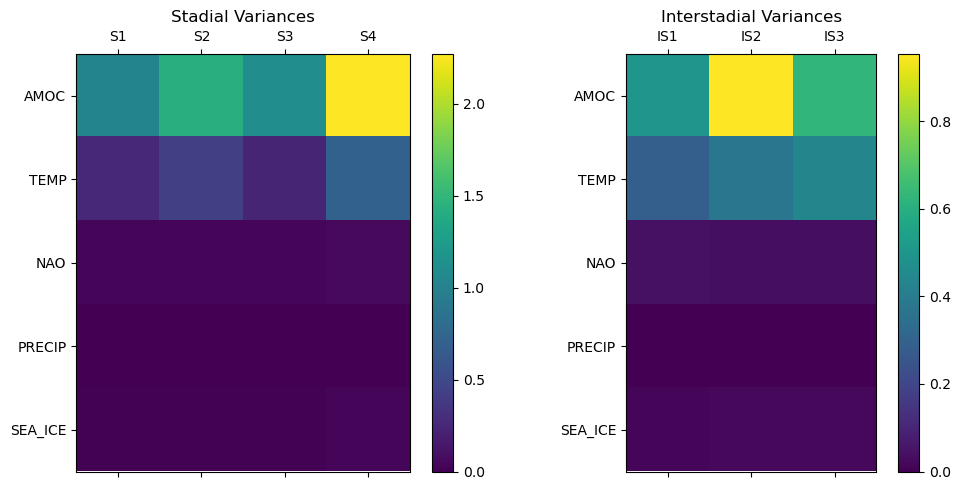

Stadial Variances:
AMOC: [1.0283768, 1.4245393, 1.117061, 2.2714212]
TEMP: [0.252705640312965, 0.42890888430862767, 0.23882451115486886, 0.7034613690364006]
NAO: [0.028956123, 0.032403316, 0.027697911, 0.057104345]
PRECIP: [3.1860571817209895e-19, 5.170664020197162e-19, 4.090560019953191e-19, 6.269166099956714e-19]
SEA_ICE: [0.010478095, 0.017570024, 0.010222252, 0.028496627]

Interstadial Variances:
AMOC: [0.4964382, 0.9535665, 0.62891376]
TEMP: [0.29010974711498483, 0.3743123275608656, 0.4362909978399921]
NAO: [0.04376459, 0.037049007, 0.036436725]
PRECIP: [1.6952219813083845e-19, 1.5567268829162258e-19, 1.6964371957233408e-19]
SEA_ICE: [0.014902073, 0.018800829, 0.021069368]


In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Center data by subtracting the mean
def center_data(detrended_data):
    centered_data = []
    for data in detrended_data:
        if len(data) > 1:
            centered_data.append(data - np.mean(data))
        else:
            centered_data.append(data)  # Leave as is if too short to center
    return centered_data

# Calculate variance of centered data
def calculate_variance(centered_data):
    variances = [np.var(data) if len(data) > 1 else 0 for data in centered_data]  # Avoid variance calc on too short data
    return variances

# Center the detrended data
centered_stadials = {var: center_data(detrended_stadials[var]) for var in variables}
centered_interstadials = {var: center_data(detrended_interstadials[var]) for var in variables}

# Calculate variances
stadial_variances = {var: calculate_variance(centered_stadials[var]) for var in variables}
interstadial_variances = {var: calculate_variance(centered_interstadials[var]) for var in variables}

# Plotting Figure 1: Centered data for each variable
fig1, axs = plt.subplots(5, 2, figsize=(12, 15))
for i, var in enumerate(variables):
    for j, data in enumerate(centered_stadials[var]):
        if len(data) > 1:
            axs[i, 0].plot(data, label=f'{stadial_labels[j]}')
    axs[i, 0].set_title(f'{var} Stadials Centered')
    axs[i, 0].legend()

    for j, data in enumerate(centered_interstadials[var]):
        if len(data) > 1:
            axs[i, 1].plot(data, label=f'{interstadial_labels[j]}')
    axs[i, 1].set_title(f'{var} Interstadials Centered')
    axs[i, 1].legend()

fig1.tight_layout()
plt.show()

# Plotting Figure 2: Variances as heatmaps
fig2, axs = plt.subplots(1, 2, figsize=(10, 5))

# Stadial variances heatmap
stadial_heatmap_data = np.array(list(stadial_variances.values()))
cax1 = axs[0].matshow(stadial_heatmap_data, cmap='viridis')
fig2.colorbar(cax1, ax=axs[0], orientation='vertical')
axs[0].set_title('Stadial Variances')
axs[0].set_xticks(np.arange(len(stadial_labels)))
axs[0].set_xticklabels(stadial_labels)
axs[0].set_yticks(np.arange(len(variables)))
axs[0].set_yticklabels(variables)

# Interstadial variances heatmap
interstadial_heatmap_data = np.array(list(interstadial_variances.values()))
cax2 = axs[1].matshow(interstadial_heatmap_data, cmap='viridis')
fig2.colorbar(cax2, ax=axs[1], orientation='vertical')
axs[1].set_title('Interstadial Variances')
axs[1].set_xticks(np.arange(len(interstadial_labels)))
axs[1].set_xticklabels(interstadial_labels)
axs[1].set_yticks(np.arange(len(variables)))
axs[1].set_yticklabels(variables)

fig2.tight_layout()
plt.show()

# Printing the variances for reference
print('Stadial Variances:')
for var, variances in stadial_variances.items():
    print(f'{var}: {variances}')

print('\nInterstadial Variances:')
for var, variances in interstadial_variances.items():
    print(f'{var}: {variances}')
